In [1]:
import os
import librosa

In [2]:
def feature_extractor(file):
    audio_data,sample_rate = librosa.load(file,duration=1)
    mfcc_feature = librosa.feature.mfcc(y=audio_data,sr=sample_rate,n_mfcc=40)
    scaled_feature = np.mean(mfcc_feature.T,axis=0)
    return scaled_feature

In [3]:
import numpy as np
mfccs_feature = []
classes = []
root_directory = '/kaggle/input/languages'
for folder in os.listdir(root_directory):
        folder_path = os.path.join(root_directory,folder)
        for file in os.listdir(folder_path)[:5000]:
            file_path = os.path.join(folder_path,file)
            mfccs_feature.append(feature_extractor(file_path))
            classes.append(folder)

In [4]:
import pandas as pd
df = pd.DataFrame({'MFCC_Features': mfccs_feature, 'Class': classes})
len(df['MFCC_Features'])
new_df = df.sample(40000)
new_df.head()

,MFCC_Features,Class
29527,"[-382.09796, 123.83064, -29.612679, 14.003787,...",sanskrit
26906,"[-156.67325, 152.1688, -26.090118, 35.67623, -...",sanskrit
28561,"[-76.56623, 72.855225, -73.52296, 81.13049, -4...",sanskrit
15232,"[-228.5586, 170.13394, -35.787766, 56.038967, ...",russian
6816,"[-148.16907, 132.71637, -38.337383, 54.702408,...",hindi


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

2024-04-19 03:44:34.119979: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 03:44:34.120100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 03:44:34.235902: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
lbl = LabelEncoder()
y = lbl.fit_transform(new_df['Class'])
X = np.array(new_df['MFCC_Features'].tolist())
y = np.array(y.tolist())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## FFNN

In [7]:
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(40,)))
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(225,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(8,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
  90/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1193 - loss: 35.3181

I0000 00:00:1713498290.339400      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1351 - loss: 10.9948 - val_accuracy: 0.1433 - val_loss: 2.0770
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1376 - loss: 2.1080 - val_accuracy: 0.1484 - val_loss: 2.0762
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1439 - loss: 2.0824 - val_accuracy: 0.1786 - val_loss: 2.0627
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1591 - loss: 2.0583 - val_accuracy: 0.2344 - val_loss: 1.9972
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1787 - loss: 2.0302 - val_accuracy: 0.2333 - val_loss: 1.9953
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1979 - loss: 2.0061 - val_accuracy: 0.2450 - val_loss: 1.9542
Epoch 7/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2050 - loss: 1.9830 - val_accuracy: 0.2691 - val_loss: 1.9225
Epoch 8/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2248 - loss: 1.9540 - val_accura

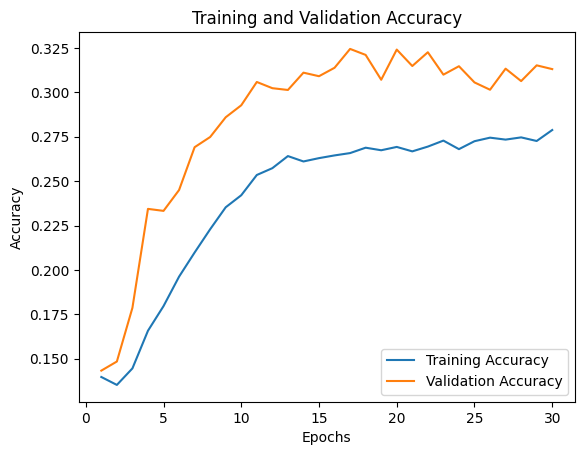

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## LSTM

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Add bidirectional LSTM layer
model.add(Bidirectional(LSTM(2048, return_sequences=True), input_shape=(None, 40)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(1024, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(512, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(256)))
model.add(Dropout(0.5))

model.add(Dense(8, activation='softmax'))

# Compile the model
learning_rate = 0.001  # Set your desired learning rate here

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Print model summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_27                │ (None, None, 4096)     │    34,226,176 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, None, 4096)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_28                │ (None, None, 2048)     │    41,951,232 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, None, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_29                │ (None, None, 1024)     │    10,489,856 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, None, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_30                │ (None, 512)            │     2,623,488 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,294,856 (340.63 MB)

 Trainable params: 89,294,856 (340.63 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
X_train.shape

(32000, 40)

In [52]:
import numpy as np

# Reshape X_train
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

# Verify the new shape
print("Original shape:", X_train.shape)
print("Reshaped shape:", X_train_reshaped.shape)

y_train_reshaped = np.reshape(y_train, (-1, 1))  # Assuming y_train is already one-dimensional
y_test_reshaped = np.reshape(y_test, (-1, 1))  # Assuming y_test is already one-dimensional

# Verify the new shapes
print("Original y_train shape:", y_train.shape)
print("Reshaped y_train shape:", y_train_reshaped.shape)
print("Original y_test shape:", y_test.shape)
print("Reshaped y_test shape:", y_test_reshaped.shape)

# Reshape X_test
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Verify the new shape
print("Original X_test shape:", X_test.shape)
print("Reshaped X_test shape:", X_test_reshaped.shape)

Original shape: (32000, 40)
Reshaped shape: (32000, 1, 40)
Original y_train shape: (32000,)
Reshaped y_train shape: (32000, 1)
Original y_test shape: (8000,)
Reshaped y_test shape: (8000, 1)
Original X_test shape: (8000, 40)
Reshaped X_test shape: (8000, 1, 40)


In [53]:
history = model.fit(X_train_reshaped,y_train_reshaped,epochs=50,batch_size=512,validation_data=(X_test_reshaped,y_test_reshaped))

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.2427 - loss: 1.9314 - val_accuracy: 0.3616 - val_loss: 1.6669
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.3826 - loss: 1.6458 - val_accuracy: 0.4305 - val_loss: 1.5495
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.4419 - loss: 1.5195 - val_accuracy: 0.4835 - val_loss: 1.4403
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.4859 - loss: 1.4294 - val_accuracy: 0.5150 - val_loss: 1.3411
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.5190 - loss: 1.3379 - val_accuracy: 0.5415 - val_loss: 1.2759
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.5448 - loss: 1.2728 - val_accuracy: 0.5689 - val_loss: 1.2107
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.5735 - loss: 1.2058 - val_accuracy: 0.5856 - val_loss: 1.1647
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.5874 - loss: 1.1598 - val_accuracy: 0.6047 

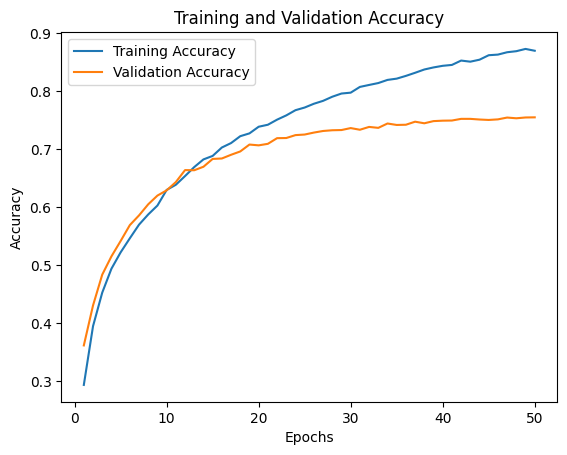

In [54]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Whisper-ASR

In [1]:
! pip install git+https://github.com/openai/whisper.git -q

In [2]:
import whisper

model = whisper.load_model("base")

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 80.3MiB/s]


In [3]:
import os
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to load audio files and extract features
def process_audio_file(file_path):
    audio = whisper.load_audio(file_path)
    audio = whisper.pad_or_trim(audio)
    mel = whisper.log_mel_spectrogram(audio).to(model.device)
    return mel

# Directory containing audio files
data_dir = "/kaggle/input/languages"
language_mapping = {
    "de": "german",
    "gu": "gujarati",
    "hi": "hindi",
    "it": "italian",
    "ja": "japanese",
    "ru": "russian",
    "sa": "sanskrit",
    "es": "spanish",
    "other": "other"
}
# Initialize lists to store ground truth and predicted labels
ground_truth = []
predicted_labels = []

# Iterate through directories and subdirectories
for root, dirs, files in os.walk(data_dir):
    for directory in dirs:
        directory_path = os.path.join(root, directory)
        i = 0  # Reset the counter for each directory
        for file_name in os.listdir(directory_path):
            if i == 100:
                break
            file_path = os.path.join(directory_path, file_name)
#             print(file_path)
            if file_path.endswith(".wav"):
                # Extract features from the audio file
                mel = process_audio_file(file_path)

                # Predict the language using the model
                _, probs = model.detect_language(mel)
                predicted_language = max(probs, key=probs.get)

                # Handle cases where predicted language is not in language_mapping
                if predicted_language not in language_mapping:
                    predicted_language = "other"

                # Extract ground truth from file name
                ground_truth_language = file_name.split("_")[0]  # Assuming file names are like "language.wav"

                # Append ground truth and predicted labels
                ground_truth.append(ground_truth_language)
                predicted_labels.append(predicted_language)
                i += 1  # Increment the counter for each processed file

                
predicted_labels = [language_mapping[l] for l in predicted_labels]

# Calculate accuracy directly from ground truth and predicted labels
accuracy = accuracy_score(ground_truth, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.805


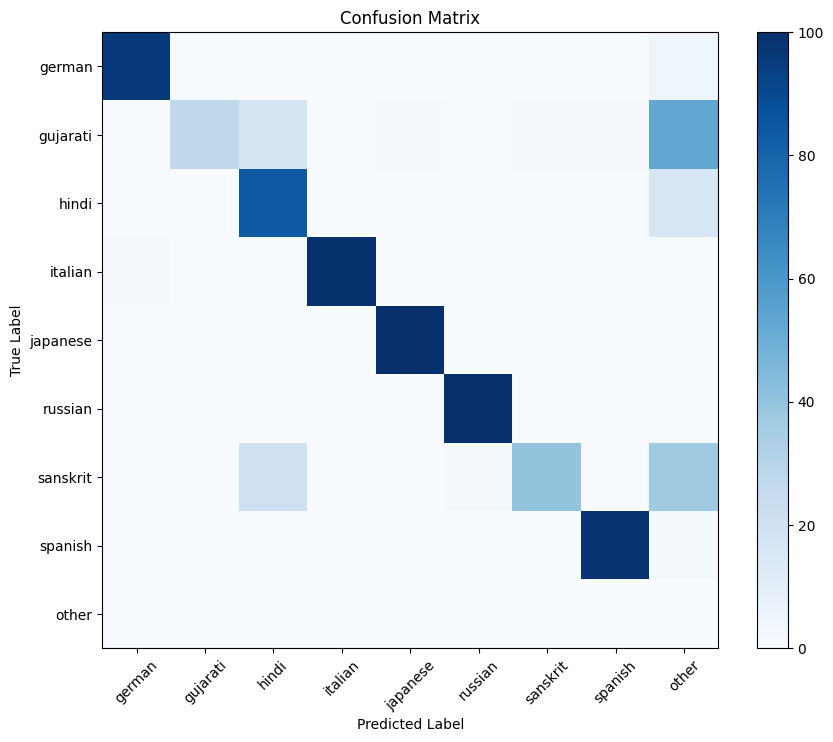

In [5]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(ground_truth, predicted_labels, labels=list(language_mapping.values()))

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(language_mapping)), list(language_mapping.values()), rotation=45)
plt.yticks(np.arange(len(language_mapping)), list(language_mapping.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [6]:
model = whisper.load_model("small")

100%|███████████████████████████████████████| 461M/461M [00:10<00:00, 44.3MiB/s]


In [7]:
import os
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to load audio files and extract features
def process_audio_file(file_path):
    audio = whisper.load_audio(file_path)
    audio = whisper.pad_or_trim(audio)
    mel = whisper.log_mel_spectrogram(audio).to(model.device)
    return mel

# Directory containing audio files
data_dir = "/kaggle/input/languages"
language_mapping = {
    "de": "german",
    "gu": "gujarati",
    "hi": "hindi",
    "it": "italian",
    "ja": "japanese",
    "ru": "russian",
    "sa": "sanskrit",
    "es": "spanish",
    "other": "other"
}
# Initialize lists to store ground truth and predicted labels
ground_truth = []
predicted_labels = []

# Iterate through directories and subdirectories
for root, dirs, files in os.walk(data_dir):
    for directory in dirs:
        directory_path = os.path.join(root, directory)
        i = 0  # Reset the counter for each directory
        for file_name in os.listdir(directory_path):
            if i == 100:
                break
            file_path = os.path.join(directory_path, file_name)
#             print(file_path)
            if file_path.endswith(".wav"):
                # Extract features from the audio file
                mel = process_audio_file(file_path)

                # Predict the language using the model
                _, probs = model.detect_language(mel)
                predicted_language = max(probs, key=probs.get)

                # Handle cases where predicted language is not in language_mapping
                if predicted_language not in language_mapping:
                    predicted_language = "other"

                # Extract ground truth from file name
                ground_truth_language = file_name.split("_")[0]  # Assuming file names are like "language.wav"

                # Append ground truth and predicted labels
                ground_truth.append(ground_truth_language)
                predicted_labels.append(predicted_language)
                i += 1  # Increment the counter for each processed file

                
predicted_labels = [language_mapping[l] for l in predicted_labels]

# Calculate accuracy directly from ground truth and predicted labels
accuracy = accuracy_score(ground_truth, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.85875


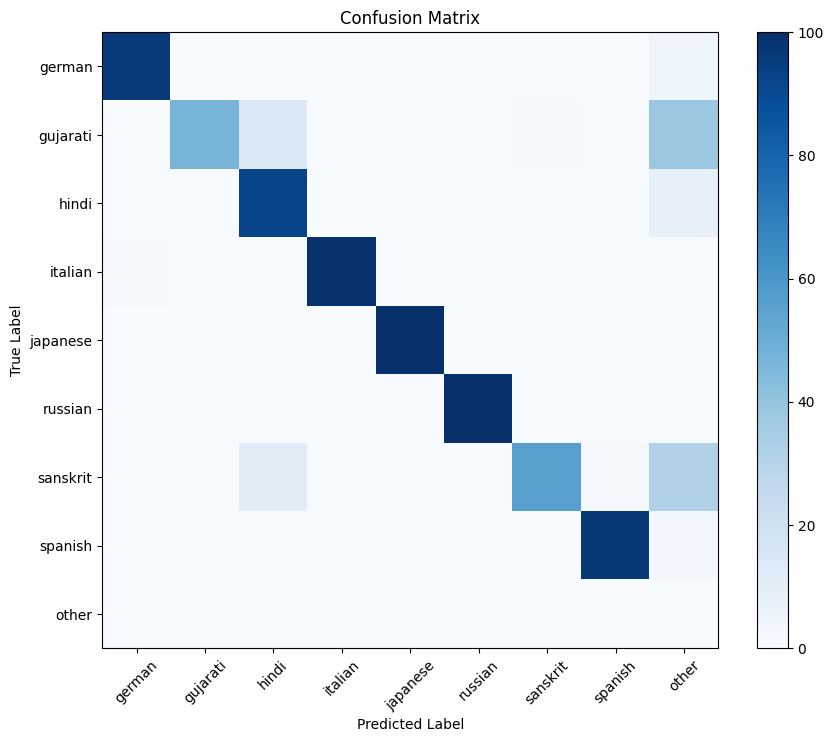

In [8]:
conf_matrix = confusion_matrix(ground_truth, predicted_labels, labels=list(language_mapping.values()))

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(language_mapping)), list(language_mapping.values()), rotation=45)
plt.yticks(np.arange(len(language_mapping)), list(language_mapping.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [9]:
model = whisper.load_model("medium")

100%|█████████████████████████████████████| 1.42G/1.42G [00:27<00:00, 54.6MiB/s]


In [10]:
import os
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to load audio files and extract features
def process_audio_file(file_path):
    audio = whisper.load_audio(file_path)
    audio = whisper.pad_or_trim(audio)
    mel = whisper.log_mel_spectrogram(audio).to(model.device)
    return mel

# Directory containing audio files
data_dir = "/kaggle/input/languages"
language_mapping = {
    "de": "german",
    "gu": "gujarati",
    "hi": "hindi",
    "it": "italian",
    "ja": "japanese",
    "ru": "russian",
    "sa": "sanskrit",
    "es": "spanish",
    "other": "other"
}
# Initialize lists to store ground truth and predicted labels
ground_truth = []
predicted_labels = []

# Iterate through directories and subdirectories
for root, dirs, files in os.walk(data_dir):
    for directory in dirs:
        directory_path = os.path.join(root, directory)
        i = 0  # Reset the counter for each directory
        for file_name in os.listdir(directory_path):
            if i == 100:
                break
            file_path = os.path.join(directory_path, file_name)
#             print(file_path)
            if file_path.endswith(".wav"):
                # Extract features from the audio file
                mel = process_audio_file(file_path)

                # Predict the language using the model
                _, probs = model.detect_language(mel)
                predicted_language = max(probs, key=probs.get)

                # Handle cases where predicted language is not in language_mapping
                if predicted_language not in language_mapping:
                    predicted_language = "other"
                
                # Extract ground truth from file name
                ground_truth_language = file_name.split("_")[0]  # Assuming file names are like "language.wav"

                # Append ground truth and predicted labels
                ground_truth.append(ground_truth_language)
                predicted_labels.append(predicted_language)
                i += 1  # Increment the counter for each processed file

                
predicted_labels = [language_mapping[l] for l in predicted_labels]
# print(predicted_labels)
# Calculate accuracy directly from ground truth and predicted labels
accuracy = accuracy_score(ground_truth, predicted_labels)
print("Accuracy:", accuracy)

['japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'japanese', 'ja

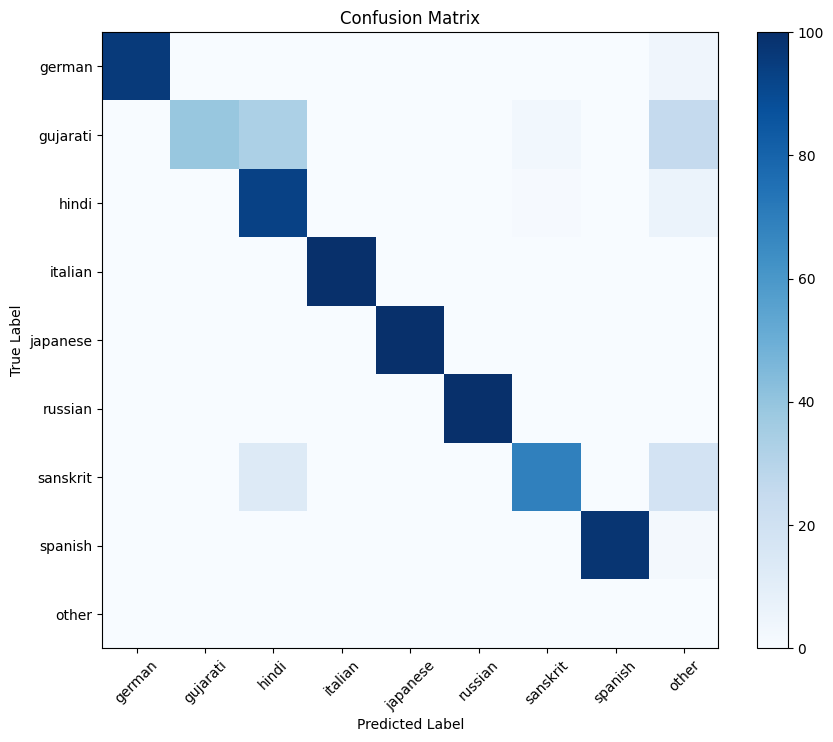

In [11]:
conf_matrix = confusion_matrix(ground_truth, predicted_labels, labels=list(language_mapping.values()))

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(language_mapping)), list(language_mapping.values()), rotation=45)
plt.yticks(np.arange(len(language_mapping)), list(language_mapping.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()